# Jeremy Trane 18357611 - Assignment 1


* I confirm I have read the first page of the report and understood it

* α = 1
* β = 1

### The first problem is described as such: 

* $min_{x1, x2}$ (3+α)$x_{1}$ +(1+β)$x_{2}$

* x2 −(β+1)$x_{1}$ +α−1≤ 0

* −$x_{2}$−2(β+1)$x_{1}$ −α+5≤0

* α+2≤5$x_{1}$ ≤25

* β+2≤10$x_{2}$ ≤200

A) Assume x1 and x2 are real-valued and solve the problem using the graphical method. (12 points)

Subbing in our α = 1 and β = 1 we get:

* $min_{x1, x2}$ 4$x_{1}$ + 2$x_{2}$

* $x_{2}$ − 2$x_{1}$ ≤ 0

* −$x_{2}$ − 4$x_{1}$ + 4 ≤ 0

* 3 ≤ 5$x_{1}$ ≤ 25

* 3 ≤ 10$x_{2}$ ≤ 200

The first step is to graph both of our lines L1 and L2 as well as our constraints as shown below:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Plotting L1 and L2
fig = plt.figure()
ax = plt.axes()
plt.grid()

x1 = np.linspace(0, 5, 1000)
x2_1 = 2*x1
x2_2 = -4*x1+4
ax.plot(x1, x2_1,color='red');
ax.plot(x1, x2_2,color='blue');

#Potting the constraints
ax.axvline(x=3/10, color='red')
ax.axvline(x=5, color='red')
ax.axhline(y=3/10, color='blue')
ax.axhline(y=20, color='blue')
#Plotting shaded region
ax.fill_between(np.linspace(0.3,0.667,200), 2*np.linspace(0.3,0.667,200),3/10,color='lightblue')
ax.fill_between(np.linspace(0.667,0.925,200), -4*np.linspace(0.667,0.925,200)+4,3/10,color='lightblue')
plt.title("Plot of L1, L2, and constraints")
plt.xlabel("x1")
plt.ylabel("x2");

The optimum minimum solution must lie between in the light blue shaded region below

Plotting our minimum line $min_{x1, x2}$ 4$x_{1}$ + 2$x_{2}$ and moving it parallel w.r.t. itself we are able to find the optimum solution

In [ ]:
#Plotting L1 and L2
fig = plt.figure()
ax = plt.axes()
plt.grid()

x1 = np.linspace(0, 5, 1000)
x2_1 = 2*x1
x2_2 = -4*x1+4
x2_3 = (-4*x1+4.3)/2
ax.plot(x1, x2_1,color='red');
ax.plot(x1, x2_2,color='blue');
ax.plot(x1, x2_3,color='green');

#Potting the constraints
ax.axvline(x=3/10, color='red')
ax.axvline(x=5, color='red')
ax.axhline(y=3/10, color='blue')
ax.axhline(y=20, color='blue')
#Plotting shaded region
ax.fill_between(np.linspace(0.3,0.667,200), 2*np.linspace(0.3,0.667,200),3/10,color='lightblue')
ax.fill_between(np.linspace(0.667,0.925,200), -4*np.linspace(0.667,0.925,200)+4,3/10,color='lightblue')
plt.title("Plot of L1, L2, and constraints")
plt.xlabel("x1")
plt.ylabel("x2");

This gives us the solution $x_{1}$=0.925, $x_{2}$=0.3, OF=4.3, A closer version of this graph is seen below

The code for this can be seen below:

In [ ]:
import pyomo.environ as pe
import pyomo.opt as po

### Model

In [ ]:
model = pe.ConcreteModel()

### Variables

In [ ]:
model.x1 = pe.Var(domain = pe.PositiveReals, bounds = (3/5, 5))
model.x2 = pe.Var(domain = pe.PositiveReals, bounds = (3/10, 20))

### Objective function

In [ ]:
expr = 4*model.x1+2*model.x2
model.obj = pe.Objective(sense = pe.minimize, expr = expr)

### Constraints

In [ ]:
lhs = model.x2-2*model.x1
rhs = 0
model.cons1 = pe.Constraint(expr = lhs <= rhs)

lhs = -model.x2-4*model.x1+4
rhs = 0
model.cons2 = pe.Constraint(expr = lhs <= rhs)

### Solver

In [ ]:
solver = po.SolverFactory('glpk')

In [ ]:
x = pe.value(model.x1)
x

In [ ]:
y = pe.value(model.x2)
y

In [ ]:
value_of_objective_function = pe.value(model.obj)
value_of_objective_function

# Question 1 B

Assume $x_{1}$ and $x_{2}$ are integers and solve the problem using Branch and Bound method. (12 points)

To use the Branch and Count method we must first ignore the fact that $x_{1}$ and $x_{2}$ are integers. 

The first step is to test for the OF which can be seen in the code below

In [ ]:
from pyomo.environ import *
import numpy as np

In [ ]:
model = AbstractModel()
model.x1 = Var(domain = PositiveReals, bounds = (3/5, 5))
model.x2 = Var(domain = PositiveReals, bounds = (3/10, 20))

In [ ]:
model.cons1 = Constraint(expr = model.x2-2*model.x1 <= 0)
model.cons2 = Constraint(expr = model.x2-4*model.x1+4 <= 0)

model.OF = Objective(rule=4*model.x1+2*model.x2, sense=minimize)

In [ ]:
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('infeasible')
else:
    print('Solver Status: ', results.solver.status)


In [ ]:
print('X1=', round(value(instance.x1),3))
print('X2=', round(value(instance.x2),3))
print('OF=', round(value(instance.OF),3))

### Now that we have found these values, let us test by changing x2 as we are trying to find the minimization and x2 is smaller

This gives:

We find that using $x_{2}$≤0 gives the answer $x_{1}$ = 1; $x_{2}$ = 0; z=4. These are all integers however, the break the constraint which defines 3/10≤$x_{2}$≤20, we must also test the other side of this condition, this being $x_{2}$ ≥ 1. This is done in the code below. This gives the branch diagram seen below:

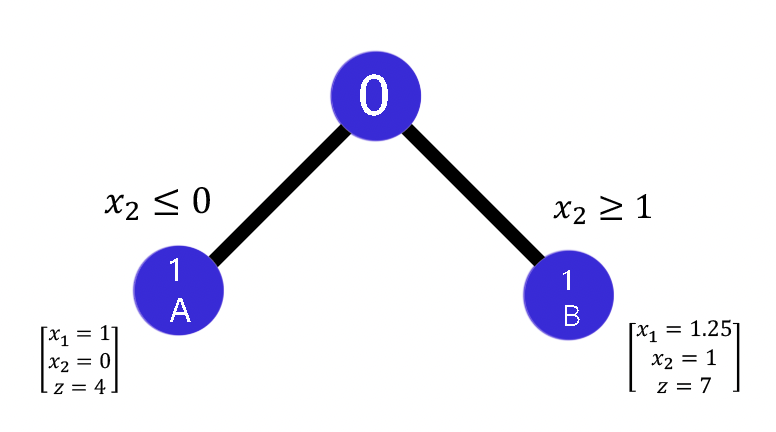

We can see that in our code the bounds in the constraints have been changed to adjust for this

In [ ]:
from pyomo.environ import *
import numpy as np

In [ ]:
model = AbstractModel()
model.x1 = Var(domain = PositiveReals, bounds = (3/10, 5))
model.x2 = Var(domain = PositiveReals, bounds = (1, 20))

In [ ]:
model.cons1 = Constraint(expr = model.x2-2*model.x1 <= 0)
model.cons2 = Constraint(expr = model.x2-4*model.x1+4 <= 0)

model.OF = Objective(rule=4*model.x1+2*model.x2, sense=minimize)

In [ ]:
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('infeasible')
else:
    print('Solver Status: ', results.solver.status)


In [ ]:
print('X1=', round(value(instance.x1),3))
print('X2=', round(value(instance.x2),3))
print('OF=', round(value(instance.OF),3))

### Now we must test for $x_{1}$ ≤ 1 and $x_{1}$ ≥ 2

When testing $x_{1}$ ≤ 1, we find that the solution is infeasible, we therefore, also test the other branch, $x_{1}$ ≥ 2

In [ ]:
from pyomo.environ import *
import numpy as np

In [ ]:
model = AbstractModel()
model.x1 = Var(domain = PositiveReals, bounds = (2, 5))
model.x2 = Var(domain = PositiveReals, bounds = (1, 20))

In [ ]:
model.cons1 = Constraint(expr = model.x2-2*model.x1 <= 0)
model.cons2 = Constraint(expr = model.x2-4*model.x1+4 <= 0)

model.OF = Objective(rule=4*model.x1+2*model.x2, sense=minimize)

In [ ]:
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('infeasible')
else:
    print('Solver Status: ', results.solver.status)


In [ ]:
print('X1=', round(value(instance.x1),3))
print('X2=', round(value(instance.x2),3))
print('OF=', round(value(instance.OF),3))

This gives us our solution. The final branch and bound diagram can be seen below

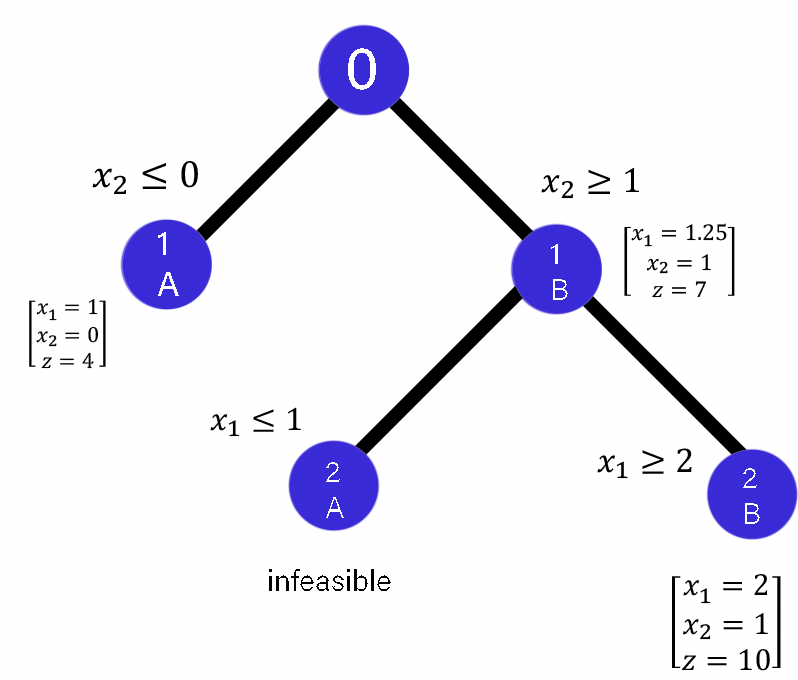

# Question 1 C

We will now repeat this process however setting $x_{1}$ and $x_{2}$ to have odd integer values

In [ ]:
from pyomo.environ import *
import numpy as np

In [ ]:
model = AbstractModel()
model.x1 = Var(domain = PositiveReals, bounds = (5, 5))
model.x2 = Var(domain = PositiveReals, bounds = (1, 20))

In [ ]:
model.cons1 = Constraint(expr = model.x2-2*model.x1 <= 0)
model.cons2 = Constraint(expr = model.x2-4*model.x1+4 <= 0)

model.OF = Objective(rule=4*model.x1+2*model.x2, sense=minimize)

In [ ]:
opt = SolverFactory('glpk')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('infeasible')
else:
    print('Solver Status: ', results.solver.status)


In [ ]:
print('X1=', round(value(instance.x1),3))
print('X2=', round(value(instance.x2),3))
print('OF=', round(value(instance.OF),3))

By changing the constraint to $x_{1}$ ≥ 3, we find our new OF of $x_{1}$ = 3, $x_{2}$ = 1, OF = 14. This gives the diagram seen below.

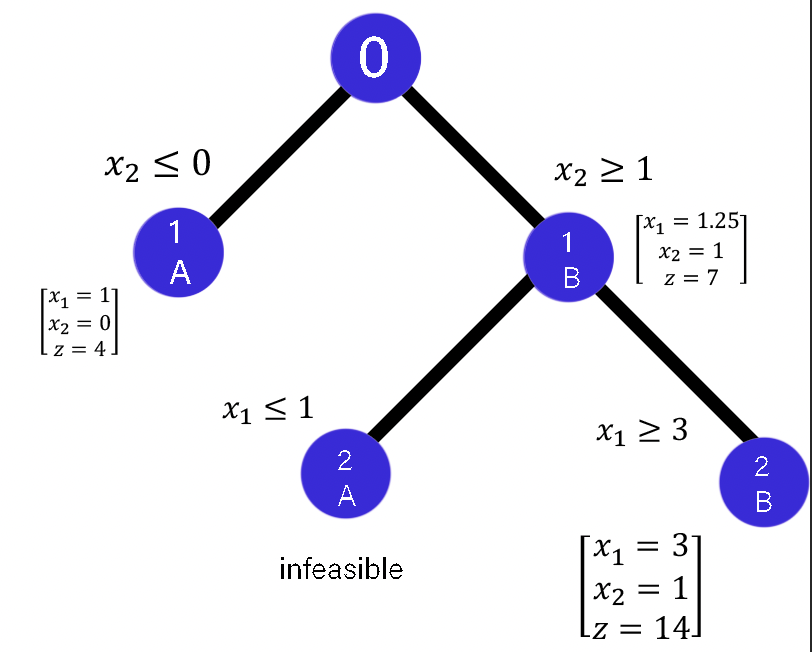

We can ensure that this is the minimal solution by changing the constraint of $x{1}$ to be 5 instead of 3 however, this returns an OF = 22, which is greater than our solution OF = 14. This confirms that this is the optimum solution for when $x{1}$ and $x{2}$ are odd numbers.

## Problem 2:

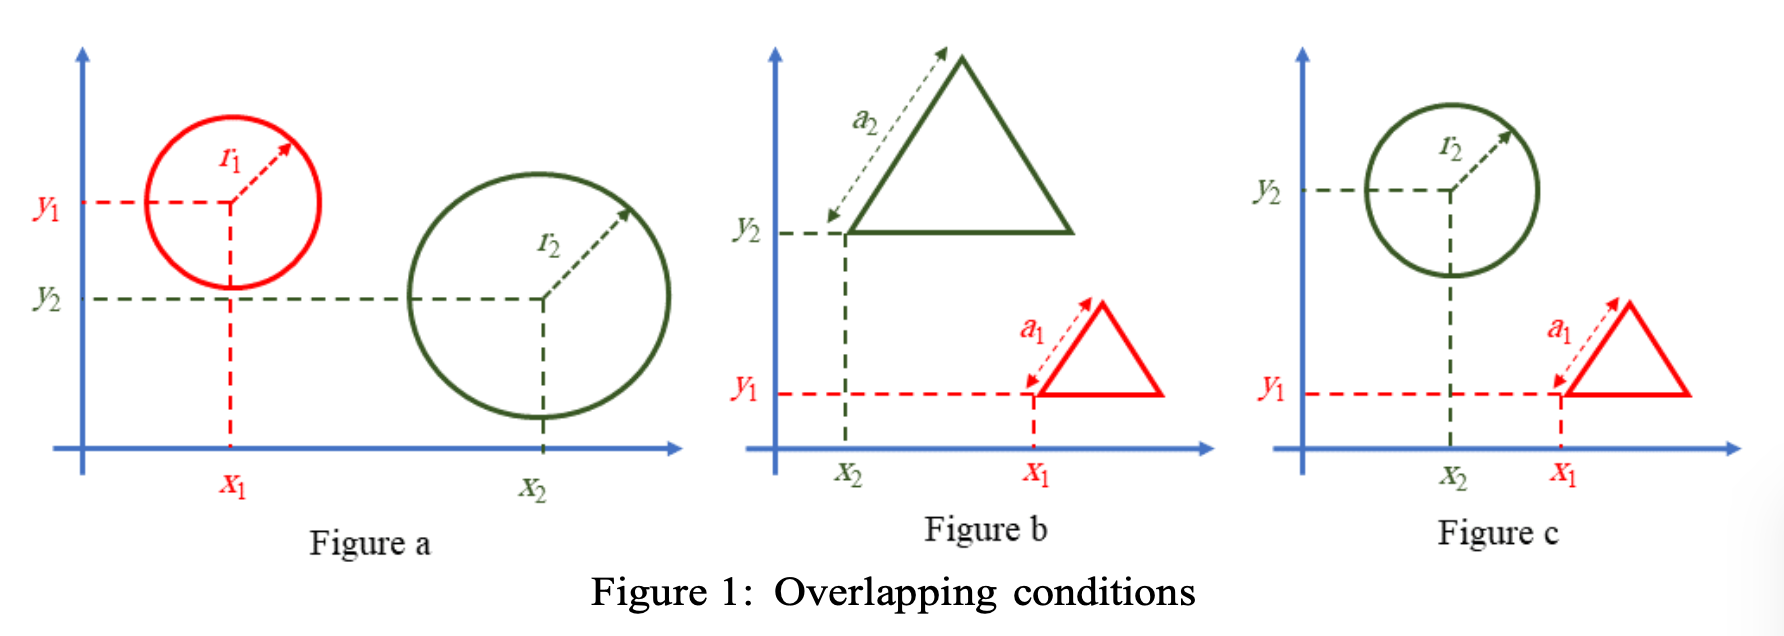

For the three Figures above, sets of constraints need to be initialized as to verify whether the shapes are overlapping or not.

## Figure A

For this we will be using the Euclidian distance from a point to the center of the circle, and comparing it to the radius of the circle. We will chose a point (x,y) and check whether this point is inside both circles or not. If it is inside both circles, we can consider both circles overlapping.

We first have a red circle with radius $r_{1}$, the distance between a point and its center can be described by the equation below:

$\sqrt{(x_{1}-x)^2+(y_{1}-y)^2}$   (1)

The second circle has radius $r_{2}$ and the Euclidian distance

$\sqrt{(x_{2}-x)^2+(y_{2}-y)^2}$   (2)

We must now introduce a new variable $U_{i}$ which will determin whether the point is inside or outside the circle.
 
$Max_{U}{\prod\limits_{i=2}^i}U_{i}$

$\sqrt{(x_{1}-x)^2+(y_{1}-y)^2}$ ≥ $r_{1}$ - M(1-$U_{1}$)

$\sqrt{(x_{2}-x)^2+(y_{2}-y)^2}$ ≥ $r_{2}$ - M(1-$U_{2}$)


Where M is a very large constant

What does this mean?

This shows us that if $U_{i}$ = 1, then we know that $\sqrt{(x_{i}-x)^2+(y_{i}-y)^2}$ ≥ $r_{i}$, showing us that the point is outside the circle, therefore, the two circles are not overlapping. The contrary is also true, if $U_{i}$ = 0, then we know that $\sqrt{(x_{i}-x)^2+(y_{i}-y)^2}$ ≤ $r_{i}$. If this is true for all our circles, we know that the two circles must be overlapping.

All of these are multiplied together to ensure that all conditions hold true.


## Figure B

For the second part we assume that we know the points $x_{1}$, $x_{2}$, $y_{1}$, $y_{2}$, and the length $a_{1}$ and $a_{2}$ as shows in the diagram below. We will use a similar approach to the one shown above.

We will determin the boundary conditions by selecting a point at random (x,y) and testing if it is inside the first triangle, and then if it is inside the second triangle.

The upper green triangle will be defined by the three following constraints:

1. y > $y_{2}$, this means if our point y is greater then the bottom line of the green triangle.

2. y - $y_{2}$ = m*(x-$x_{2}$), where m = $\sqrt{3}$ in this case as the triangle is an equilateral triangle.

   y <  $\sqrt{3}(x-x_{2})+y_{2}$, this means if our point y is lower than the left side of the green triangle.

    And similarly
    
3. y < -$\sqrt{3}(x-(x_{2}+a_{2}))+y_{2}$, if the point y is lower than the rhs of our green triangle.

We will also do the same for the lower red triangle:
 
1. y > $y_{1}$

2. y < $\sqrt{3}(x-x_{1})+y_{1}$

3. y < -$\sqrt{3}(x-(x_{1}+a_{1}))+y_{1}$

The U variable must once again be added. This variable once again being either 0 or 1 

$Max_{U}{\prod\limits_{i=6}^i}U_{i}$


y > $y_{2} - M(1-U_{1}$)

y <  $\sqrt{3}(x-x_{2})+y_{2} + M(1-U_{2}$)

y < -$\sqrt{3}(x-(x_{2}+a_{2}))+y_{2} + M(1-U_{3}$)

y > $y_{1} - M(1-U_{4}$)

y < $\sqrt{3}(x-x_{1})+y_{1} + M(1-U_{5}$)

y < -$\sqrt{3}(x-(x_{1}+a_{1}))+y_{1} + M(1-U_{6}$)

Where once again M is a very large integer

## Figure C

In this case we have a triangle and a circle. We will once again be using the same approach as seen in the two previous parts, however, using four constraints. One for the circle and three for the triangle.


Once again our circle has a known radius $r_{2}$.

The distance between our arbitrary point and the center of the circle can once again be described by the Euclidian distance 

d=$\sqrt{(x_{2}-x)^2+(y_{2}-y)^2}$   (1)

The triangle constraints are seen below:

1. y > $y_{1}$

2. y < $\sqrt{3}(x-x_{1})+y_{1}$

3. y < -$\sqrt{3}(x-(x_{1}+a_{1}))+y_{1}$

Our variable $U_{i}$ is introduced and the product of these is obtained:

$Max_{U}{\prod\limits_{i=4}^i}U_{i}$

y > $y_{1}$ - M (1 - $U_{1}$)

y + M(1 - $U_{2}$) < $\sqrt{3}(x-x_{1})+y_{1}$ 

y < -$\sqrt{3}(x-(x_{1}+a_{1}))+y_{1}$ + M(1 - $U_{3}$)

$\sqrt{(x_{2}-x)^2+(y_{2}-y)^2}$ - M(1 - $U_{4}$) ≤ $r_{2}$ 


# Question 3

## Finding the optimal location for business investment

According to the finance department, a company can invest a
maximum of 20 + 2α + β + 5 €M, = 28M€. We also now know this is a miximization problem.

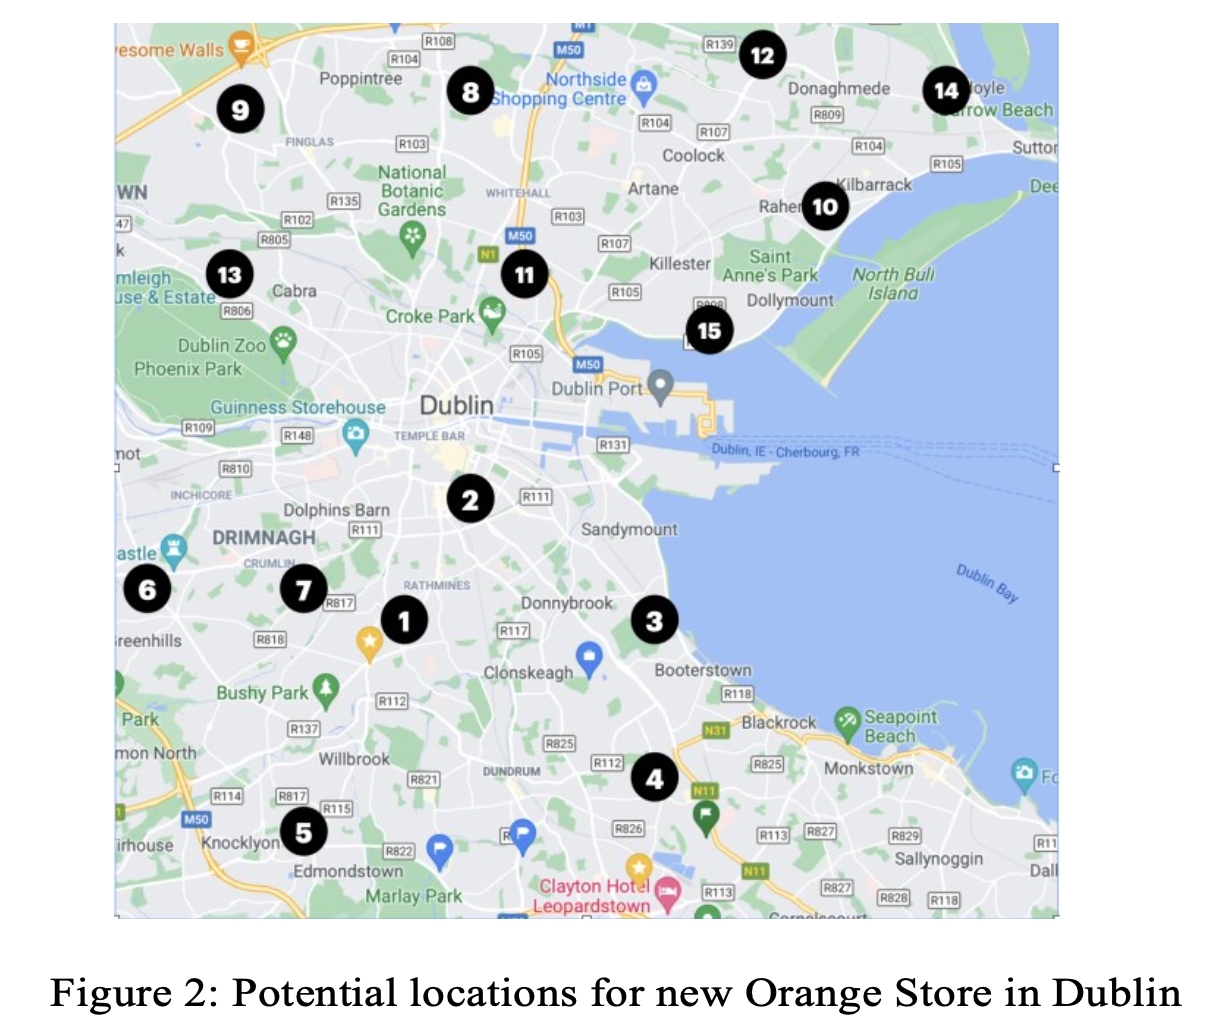



| Location | Cost | Net Profit |
| :- | -: | :-: |
| 1 | 10 | 6 |
| 2 | 5 | 12 |
| 3 | 5 | 10 |
| 4 | 10 | 5 |
| 5 | 2 | 11 |
| 6 | 5 | 5 |
| 7 | 10 | 3 |
| 8 | 5 | 6 |
| 9 | 12 | 5 |
| 10 | 4 | 9 |
| 11 | 7 | 10 |
| 12 | 10 | 2 |
| 13 | 12 | 3 |
| 14 | 11 | 11 |
| 15 | 3 | 7 |





* **Step 1: Undrestanding the problem.**

What is being optimized, i.e., what is the objective?
* To maximize the profit from each location with a set budget

What are the parameters?
* cost: how much does one location cost? 

What constraints do we have?
* budget: how much money is the company willing to spend? 


In [5]:
from pyomo.environ import *

First models are setup with the data which will be taken in

In [6]:
model       = AbstractModel()
model.i     = Set()
model.Cost = Param(model.i,mutable=True)
model.Profit = Param(model.i,mutable=True)
model.Location = Param(model.i,mutable=True)
model.u = Var(model.i, domain=Binary)
budget = 28
n = 4

The constraints are setup, for a) this is simply that the sum of the costs must not be greater than our budget

In [7]:
def con1_rule(model,i):
    return sum( model.Cost[i]*model.u[i] for i in model.i) <= budget
model.con1 = Constraint(model.i,rule=con1_rule)

def obj_rule(model):
    return sum(model.Profit[i]*model.u[i] for i in model.i)
model.OF = Objective(sense = maximize, rule = obj_rule)

In [9]:
instance = model.create_instance("profit.dat")

OSError: Syntax error at token 'WORD' with value 'Location' (line 7, column 1)

In [ ]:
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

We can see the OF (being profit), as well as the cost and locations to chosse below

In [ ]:
total_cost = 0;
for i in instance.i:
    if (value(instance.u[i]) == 1):
        total_cost = total_cost + value(instance.Cost[i])
        
print(total_cost)
print('OF=', value(instance.OF))

#### Part B)

For this part we will repeat the process above however, adding the constaint that there cannot be more than 5 locations in total, for this we will add the constaint that the sum must be smaller or equal to 4

In [1]:
from pyomo.environ import *

In [2]:
model       = AbstractModel()
model.i     = Set()
model.Cost = Param(model.i,mutable=True)
model.Profit = Param(model.i,mutable=True)
model.Location = Param(model.i,mutable=True)
model.u = Var(model.i, domain=Binary)
budget = 28
n = 4

In [3]:
def con1_rule(model,i):
    return sum( model.Cost[i]*model.u[i] for i in model.i) <= budget
model.con1 = Constraint(model.i,rule=con1_rule)

def con2_rule(model,i):
    return sum( model.u[i] for i in model.i) <= n
model.con2 = Constraint(model.i,rule=con2_rule)

def obj_rule(model):
    return sum(model.Profit[i]*model.u[i] for i in model.i)
model.OF = Objective(sense = maximize, rule = obj_rule)

In [4]:
instance = model.create_instance("profit.dat")

OSError: Syntax error at token 'WORD' with value 'Location' (line 3, column 1)

In [ ]:
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

We can see the OF (being profit), as well as the cost and locations to chosse below

In [ ]:
total_cost = 0;
for i in instance.i:
    if (value(instance.u[i]) == 1):
        print(instance.Location[i])
        total_cost = total_cost + value(instance.Cost[i])
        
print(total_cost)
print('OF=', value(instance.OF))

### Section C)


Finally for this section we will once again repeat the steps above however, adding two more constaints which will tell us that the first half of the set i (1-7) canot have more than 2 locations, similar with the set 8-15. 

In [ ]:
from pyomo.environ import *

In [ ]:
model       = AbstractModel()
model.i     = Set()
model.Cost = Param(model.i,mutable=True)
model.Profit = Param(model.i,mutable=True)
model.Location = Param(model.i,mutable=True)
model.u = Var(model.i, domain=Binary)
budget = 28
n = 4
num_of_loc = 2

Two more constaints con3_rule and con4_rule are added as seen below

In [ ]:
def con1_rule(model,i):
    return sum( model.Cost[i]*model.u[i] for i in model.i) <= budget
model.con1 = Constraint(model.i,rule=con1_rule)

def con2_rule(model,i):
    return sum( model.u[i] for i in model.i) <= n
model.con2 = Constraint(model.i,rule=con2_rule)

def con3_rule(model,i):
    return sum( model.u[i] for i in range(1,8)) <= num_of_loc
model.con3 = Constraint(model.i,rule=con3_rule)

def con4_rule(model,i):
    return sum( model.u[i] for i in range(8,16)) <= num_of_loc
model.con4 = Constraint(model.i,rule=con4_rule)

def obj_rule(model):
    return sum(model.Profit[i]*model.u[i] for i in model.i)
model.OF = Objective(sense = maximize, rule = obj_rule)

In [ ]:
instance = model.create_instance("profit.dat")

In [ ]:
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

Once again the total cost, profit and locations to pick are seen below

In [ ]:
total_cost = 0;
for i in instance.i:
    if (value(instance.u[i]) == 1):
        print(instance.Location[i])
        total_cost = total_cost + value(instance.Cost[i])
        
print(total_cost)
print('OF=', value(instance.OF))

# Question 4, bonus question

Develop a set of inequalities to linearize the following constraint set, where x and y are both real-valued.

xy = 0 (1)

x ≥ 0, and y ≤ 0 (2)

We can see that as xy = 0, when x ≠ 0, y = 0, otherwise (1) doesn't hold. The contrary is also true, meaning that when y ≠ 0, x = 0. 

To do so we use the additional of a binary variable u. This value will be either 0 or 1, and will be used to see if the constraints hold true.

We can setup the inequality:

y + x(u-1) ≤ 0 ≤ x + y(u-1)

Where, if x = 0, u = 1. If x ≠ 0 & y ≠ 0, u = 1. If x ≠ 0 & y = 0, u = 0. (3)

x = 0, u = 1 lhs,

if x = 0, we know y is negative hence y ≤ 0 holds.

if x ≠ 0, u = 1 lhs, 

if x is an a real value (could be larger than y in magnitude), then u - 1 = 0, multiplying x by 0, and once again we get that y ≤ 0. (as y is negative).

x = 0, u = 1 rhs,

if x = 0, then we multiply y by u-1, or 0, whcih we would get that 0 ≤ 0, or, 0 = 0.

x ≠ 0, u = 1 rhs,

x is a non zero integer, y will be multiplied by 0, hence giving, 0 ≤ x, which once again holds.

We split (1) into two parts here, x(u-1) = 0 = y(u-1). We can see here that applying the constaints found in (3) renders this equation true for all values of x, y ∈ R.